In [169]:
import pandas as pd
import numpy as np
import psycopg2
from datetime import timedelta

%matplotlib inline

con = psycopg2.connect (user = 'postgres',
                password = 'postgres',
                port = '5432',
                
                database = 'inicudb')

cur  = con.cursor()

In [171]:
schemaName = "apollo"




In [172]:
cur1 = con.cursor()
cur1.execute("SELECT uhid,dischargestatus,birthweight,gestationweekbylmp,gestationdaysbylmp,weight_galevel,central_temp,bp_mean,admissionweight,dateofadmission,timeofadmission FROM "+schemaName+".baby_detail as t1 WHERE dateofadmission >= '2018-07-01' AND dateofadmission <= '2020-05-31' and UHID IN  (select distinct(uhid) from "+schemaName+".babyfeed_detail where uhid in  ( select distinct(uhid) from "+schemaName+".baby_visit where uhid in (select  distinct(uhid) from "+schemaName+".nursing_vitalparameters where uhid in ( select distinct(uhid) from "+schemaName+".device_monitor_detail UNION select distinct(uhid) from "+schemaName+".device_monitor_detail_dump)))) and (dischargestatus = 'Discharge' OR dischargestatus = 'Death' ) and isreadmitted is not true and gestationweekbylmp is not null and birthweight is not null;")

cols1 = list(map(lambda x: x[0], cur1.description))
ds = pd.DataFrame(cur1.fetchall(),columns=cols1)
#ds.sort_values('modificationtime',inplace=True)

In [173]:
uhids = ds.uhid.unique()

In [174]:
def birthweight_correction(x):
    if x<0.6:
        return x * 1000
    elif x<2.0 and x>1.1:
        return x * 1000
    elif x>=2.0 and x<4.0:
        return x * 1000
    else:
        return x

In [175]:
def temp_correction(x):
    if x> 50:
        return 36.5
    else:
        return x

In [176]:
ds.central_temp = ds.central_temp.apply(temp_correction)

In [177]:
ds.birthweight = ds.birthweight.apply(birthweight_correction)

In [178]:
def start_time(x,y):
    try:
        y = str(y)
        if x.split(',')[2] == 'AM':
            return y +" "+ x.split(',')[0] +":"+ x.split(',')[1] + ".000"
        else:
            return str(pd.to_datetime(y +" "+ x.split(',')[0] +":"+ (x.split(',')[1]) + ".000") + timedelta(hours=12))
    except:
        pass

In [179]:
ds['admission_date'] = ds.apply(lambda x: start_time(x['timeofadmission'],x['dateofadmission']),axis=1)

In [180]:
ds.bp_mean = ds.bp_mean.fillna(38.0)

In [181]:
def to_date(x):
    return pd.to_datetime(x)

ds['admission_date'] = ds['admission_date'].apply(to_date)
ds['CRIB_1Hr'] = ds['admission_date'] + timedelta(hours = 12)

In [182]:
#Blood Gas
cur2 = con.cursor()
cur2.execute("SELECT t1.uhid,t1.modificationtime,t1.ph,t1.po2 FROM apollo.nursing_bloodgas AS t1 ;")
cols2 = list(map(lambda x: x[0], cur2.description))
bloodgas = pd.DataFrame(cur2.fetchall(),columns=cols2)
#ds.sort_values('modificationtime',inplace=True)

In [183]:
bloodgas_1 = pd.DataFrame(columns=bloodgas.columns)
for i in uhids:
    try:
        x = be[be['uhid']==i]
        if(len(x) > 0):
            u = ds[ds['uhid']==i]
            if(len(u) > 0):
                j = u.CRIB_1Hr.iloc[0]
                print(i)


                x = x[x['modificationtime']<=j]
                bloodgas_1 = bloodgas_1.append(x,ignore_index=True)
    except:
        continue

In [36]:
u

NameError: name 'u' is not defined

In [186]:
#FiO2
cur3 = con.cursor()
cur3.execute("SELECT t1.uhid,t1.fio2,t1.start_time,t1.modificationtime FROM zz_apollo.device_ventilator_detail AS t1 UNION SELECT t2.uhid,t2.fio2,t2.start_time,t2.modificationtime FROM zz_apollo.device_ventilator_detail AS t2;")
cols3 = list(map(lambda x: x[0], cur3.description))
fio2 = pd.DataFrame(cur3.fetchall(),columns=cols3)
#ds.sort_values('modificationtime',inplace=True)

In [187]:
len(fio2)

58359

In [188]:
fio2_1 = pd.DataFrame(columns=fio2.columns)
for i in uhids:
    try:
        x = fio2[fio2['uhid']==i]
        u = ds[ds['uhid']==i]
        j = u.CRIB_1Hr.iloc[0]
        

        x = x[x['modificationtime']<=j]
        print(i)
        fio2_1 = fio2_1.append(x,ignore_index=True)
        
    except:
        p =1 

RSHI.0000016326
RSHI.0000021953
RSHI.0000023186
RSHI.0000023179
RSHI.0000022313
RSHI.0000014327
RSHI.0000014844
RSHI.0000014911
RSHI.0000017640
RNEH.0000013244
RSHI.0000014306
RSHI.0000024608
RNEH.0000014505
RSHI.0000022306
RSHI.0000024036
RSHI.0000013958
RSHI.0000012851
RSHI.0000015772
RSHI.0000015661
RSHI.000021978
RSHI.0000021977
RSHI.0000019468
RSHI.0000022355
RSHI.0000016924
RSHI.0000022118
RSHI.0000022117
RSHI.0000022054
RSHI.0000023222
RSHI.0000017430
RSHI.0000022404
RSHI.0000023255
RSHI.0000022000
RNEH.0000014594
RSHI.0000022137
RSHI.0000022016
RNEH.0000013263
RSHI.0000022092
RSHI.0000022108
RSHI.0000025737
RSHI.0000022064
RSHI.0000022270
RSHI.0000022132
RSHI.0000022093
RSHI.0000023343
RSHI.0000022346
RSHI.0000022214
RSHI.0000022215
RNEH.0000013157
RSHI.0000016530
RSHI.0000022450
RSHI.0000017306
RSHI.0000021579
RNEH.0000013276
RNEH.0000013403
RSHI.0000023174
RSHI.0000012661
RSHI.0000021806
RSHI.0000024071
RSHI.0000018006
RSHI.0000012827
RSHI.0000019088
RSHI.0000019142
RSHI.0000

RSHI.0000014265
RSHI.0000015873
RSHI.0000015961
RNEH.0000008351
RSHI.0000015178
RSHI.0000014975
RSHI.0000015213
RSHI.0000017651
RSHI.0000022761
RSHI.0000022773
RSHI.0000015331
RSHI.0000015793
RNEH.0000008375
RSHI.0000014898
RSHI.0000015979
RSHI.0000015212
RSHI.0000015938
RSHI.0000022834
RSHI.0000022850
RNEH.0000008302
RSHI.0000016050
RSHI.0000022849
RSHI.0000014215
RSHI.0000017056
RSHI.0000014884
RSHI.0000017057
RSHI.0000022854
RSHI.0000012088
RSHI.0000016112
RSHI.0000017047
RSHI.0000017431
RSHI.0000017466
RNEH.0000013623
RNEH.0000008377
RSHI.0000022896
RSHI.0000023500
RSHI.0000023490
RNEH.0000014327
RNEH.0000008001
RSHI.0000013718
RSHI.0000022830
RSHI.0000022735
RSHI.0000022808
RNEH.0000014315
RSHI.0000021832
RSHI.0000024315
RSHI.0000022786
RSHI.0000013163
RSHI.0000013264
RSHI.0000023554
000013967
RSHI0000022137
RSHI.0000024986
RSHI.0000023451
RSHI.0000024316
RSHI.0000024070
RSHI.0000024958
RSHI.0000023460
RSHI0000017181
RSHI0000016859
RSHI0000022853
RSHI.0000024258
RSHI.000023494
RSH

In [189]:
#Urine
cur4 = con.cursor()
cur4.execute("SELECT t1.uhid,t1.urine,t1.entry_timestamp FROM apollo.nursing_intake_output AS t1 ;")
cols4 = list(map(lambda x: x[0], cur4.description))
urine = pd.DataFrame(cur4.fetchall(),columns=cols4)
#ds.sort_values('modificationtime',inplace=True)

In [190]:
def tzone(x):
    return x.replace(tzinfo=None)

In [191]:
urine['modtime'] = urine.entry_timestamp.apply(tzone)

In [192]:
urine_1 = pd.DataFrame(columns=urine.columns)
for i in uhids:
    try:
        x = urine[urine['uhid']==i]
        u = ds[ds['uhid']==i]
        j = u.CRIB_1Hr.iloc[0]
        

        x = x[x['modtime']<=j]
        print(i)
        urine_1 = urine_1.append(x,ignore_index=True)
        
    except:
        p = 1

RSHI.0000016326
RSHI.0000021953
RSHI.0000023186
RSHI.0000023179
RSHI.0000022313
RSHI.0000014327
RSHI.0000014844
RSHI.0000014911
RSHI.0000017640
RNEH.0000013244
RSHI.0000014306
RSHI.0000024608
RNEH.0000014505
RSHI.0000022306
RSHI.0000024036
RSHI.0000013958
RSHI.0000012851
RSHI.0000015772
RSHI.0000015661
RSHI.000021978
RSHI.0000021977
RSHI.0000019468
RSHI.0000022355
RSHI.0000016924
RSHI.0000022118
RSHI.0000022117
RSHI.0000022054
RSHI.0000023222
RSHI.0000017430
RSHI.0000022404
RSHI.0000023255
RSHI.0000022000
RNEH.0000014594
RSHI.0000022137
RSHI.0000022016
RNEH.0000013263
RSHI.0000022092
RSHI.0000022108
RSHI.0000025737
RSHI.0000022064
RSHI.0000022270
RSHI.0000022132
RSHI.0000022093
RSHI.0000023343
RSHI.0000022346
RSHI.0000022214
RSHI.0000022215
RNEH.0000013157
RSHI.0000016530
RSHI.0000022450
RSHI.0000017306
RSHI.0000021579
RNEH.0000013276
RNEH.0000013403
RSHI.0000023174
RSHI.0000012661
RSHI.0000021806
RSHI.0000024071
RSHI.0000018006
RSHI.0000012827
RSHI.0000019088
RSHI.0000019142
RSHI.0000

RSHI.0000015961
RNEH.0000008351
RSHI.0000015178
RSHI.0000014975
RSHI.0000015213
RSHI.0000017651
RSHI.0000022761
RSHI.0000022773
RSHI.0000015331
RSHI.0000015793
RNEH.0000008375
RSHI.0000014898
RSHI.0000015979
RSHI.0000015212
RSHI.0000015938
RSHI.0000022834
RSHI.0000022850
RNEH.0000008302
RSHI.0000016050
RSHI.0000022849
RSHI.0000014215
RSHI.0000017056
RSHI.0000014884
RSHI.0000017057
RSHI.0000022854
RSHI.0000012088
RSHI.0000016112
RSHI.0000017047
RSHI.0000017431
RSHI.0000017466
RNEH.0000013623
RNEH.0000008377
RSHI.0000022896
RSHI.0000023500
RSHI.0000023490
RNEH.0000014327
RNEH.0000008001
RSHI.0000013718
RSHI.0000022830
RSHI.0000022735
RSHI.0000022808
RNEH.0000014315
RSHI.0000021832
RSHI.0000024315
RSHI.0000022786
RSHI.0000013163
RSHI.0000013264
RSHI.0000023554
000013967
RSHI0000022137
RSHI.0000024986
RSHI.0000023451
RSHI.0000024316
RSHI.0000024070
RSHI.0000024958
RSHI.0000023460
RSHI0000017181
RSHI0000016859
RSHI0000022853
RSHI.0000024258
RSHI.000023494
RSHI.0000023049
RNEH.0000013396
RSH

In [193]:
#apgar
cur5 = con.cursor()
cur5.execute("SELECT t1.uhid,t1.apgar_fivemin FROM apollo.birth_to_nicu AS t1 ;")
cols5 = list(map(lambda x: x[0], cur5.description))
apgar = pd.DataFrame(cur5.fetchall(),columns=cols5)
#ds.sort_values('modificationtime',inplace=True)

In [194]:
def ph_func(x):
    try:
        p = float(x)
        if p>=6.5 and p<=7.80:
            return p
        else:
            return None
    except:
        pass

In [195]:
bloodgas_1['new_ph'] = bloodgas_1['ph'].apply(ph_func)

In [196]:
bloodgas_1.sort_values('new_ph',inplace=True)

In [197]:
bloodgas_1.drop_duplicates('uhid',keep='first',inplace=True)

,uhid,modificationtime,ph,po2,new_ph


In [198]:
fio2_1

,uhid,fio2,start_time,modificationtime
0,RSHI.0000024316,100.0,2020-03-19 02:16:39.473000+05:30,2020-03-18 20:46:39.475899
1,RSHI.0000024316,100.0,2020-03-19 02:17:39.647000+05:30,2020-03-18 20:47:39.647850
2,RSHI.0000024316,22.0,2020-03-18 21:26:49.671000+05:30,2020-03-18 15:56:49.671485
3,RSHI.0000024316,22.0,2020-03-18 21:27:49.865000+05:30,2020-03-18 15:57:33.035750
4,RSHI.0000024316,22.0,2020-03-18 21:28:50.032000+05:30,2020-03-18 15:58:33.042480
5,RSHI.0000024316,22.0,2020-03-18 21:29:50.220000+05:30,2020-03-18 15:59:33.038517
6,RSHI.0000024316,22.0,2020-03-18 21:30:50.404000+05:30,2020-03-18 16:00:33.026058
7,RSHI.0000024316,22.0,2020-03-18 21:31:50.562000+05:30,2020-03-18 16:01:50.563059
8,RSHI.0000024316,22.0,2020-03-18 21:32:50.719000+05:30,2020-03-18 16:02:50.720062
9,RSHI.0000024316,22.0,2020-03-18 21:33:50.895000+05:30,2020-03-18 16:03:44.932115


In [199]:
def to_float(x):
    try:
        return float(x)
    except:
        pass
fio2_1['fio2'] = fio2_1['fio2'].apply(to_float)

In [200]:
#fio2_1 = fio2_1.groupby('uhid').mean()

In [201]:
urine_1['urine'] = urine_1.urine.apply(to_float)

In [202]:
apgar['apgar_fivemin'] = apgar['apgar_fivemin'].apply(to_float)

In [203]:
df = pd.merge(ds,bloodgas_1,on=['uhid'],how='left',copy=False)

In [204]:
df = pd.merge(df,fio2_1,on=['uhid'],how='left',copy=False)

In [205]:
df = pd.merge(df,urine_1,on=['uhid'],how='left',copy=False)

In [206]:
apgar.drop_duplicates('uhid',keep='first',inplace=True)

In [207]:
apgar.dropna(inplace=True)

In [208]:
data = pd.merge(df,apgar,on=['uhid'],how='left',copy=False)

In [209]:
data.weight_galevel.unique()

array(['AGA', 'SGA', 'LGA', None], dtype=object)

In [210]:
def sga(x):
    if x == 'SGA':
        return 1
    else:
        return 0
data.weight_galevel = data.weight_galevel.apply(sga)

In [211]:
data['po2'] = data.po2.apply(to_float)

In [212]:
data = (data.drop_duplicates(subset='uhid',keep='first'))

In [213]:
data.fio2 = data.fio2.fillna(21)

In [214]:
data.count()

uhid                  804
dischargestatus       804
birthweight           804
gestationweekbylmp    804
gestationdaysbylmp    804
weight_galevel        804
central_temp           73
bp_mean               804
admissionweight       730
dateofadmission       804
timeofadmission       804
admission_date        795
CRIB_1Hr              795
modificationtime_x      0
ph                      0
po2                     0
new_ph                  0
fio2                  804
start_time              3
modificationtime_y      3
urine                 263
entry_timestamp       624
modtime               624
apgar_fivemin         566
dtype: int64

In [215]:
data['po2_fio2_ratio'] = data['po2']/data['fio2']

In [216]:
data.central_temp = data.central_temp.fillna(35.7)
data.po2_fio2_ratio = data.po2_fio2_ratio.fillna(2.49)
data.new_ph = data.new_ph.fillna(7.21)

In [217]:
data['urine_output'] = data['urine']/(24*data['admissionweight'])

In [218]:
data.urine_output = data.urine_output.fillna(1.0)
data.apgar_fivemin = data.apgar_fivemin.fillna(8)
data.birthweight = data.birthweight.fillna(1001.0)

In [219]:
def mean_bp(x):
    if x < 20.0:
        return 19
    elif x>=20 and x<30:
        return 9
    else:
        return 0

In [220]:
def temp(x):
    if x>35.6:
        return 0
    elif x>35 and x<=35.6:
        return 8
    else:
        return 15

In [221]:
def po2_fio2(x):
    if x>2.49:
        return 0
    elif x>1.0 and x<=2.49:
        return 5
    elif x>0.3 and x<=0.99:
        return 16
    else:
        return 28    

In [222]:
def ph_calc(x):
    if x>7.20:
        return 0
    elif x>7.10 and x<=7.19:
        return 7
    else:
        return 16

In [223]:
def urine_output_calc(x):
    if x>=1.0:
        return 0
    elif x>0.1 and x<=0.9:
        return 5
    else:
        return 18

In [224]:
def apgar(x):
    if x>=7:
        return 0
    else:
        return 8

In [225]:
def birthweight_calc(x):
    if x>=1000.0:
        return 0
    elif x>750.0 and x<=999.0:
        return 10
    else:
        return 17

In [226]:
def sga_calc(x):
    if x==0:
        return 0
    else:
        return 12

In [227]:
data['test'] = data.weight_galevel.apply(sga_calc)

In [228]:
snap_2 = data.copy()

In [229]:
snap_2.columns

Index(['uhid', 'dischargestatus', 'birthweight', 'gestationweekbylmp',
       'gestationdaysbylmp', 'weight_galevel', 'central_temp', 'bp_mean',
       'admissionweight', 'dateofadmission', 'timeofadmission',
       'admission_date', 'CRIB_1Hr', 'modificationtime_x', 'ph', 'po2',
       'new_ph', 'fio2', 'start_time', 'modificationtime_y', 'urine',
       'entry_timestamp', 'modtime', 'apgar_fivemin', 'po2_fio2_ratio',
       'urine_output', 'test'],
      dtype='object')

In [230]:
cols_snap_2 = ['uhid', 'dischargestatus',
        'central_temp', 'bp_mean',
        'new_ph', 'po2_fio2_ratio',
       'urine_output']

In [231]:
snap_2 = snap_2[cols_snap_2]

In [232]:
snap_2

,uhid,dischargestatus,central_temp,bp_mean,new_ph,po2_fio2_ratio,urine_output
0,RSHI.0000016326,Discharge,35.7,38.0,7.21,2.49,0.000256
4,RSHI.0000021953,Death,35.7,38.0,7.21,2.49,1.000000
17,RSHI.0000023186,Discharge,35.7,38.0,7.21,2.49,0.000219
25,RSHI.0000023179,Discharge,35.7,38.0,7.21,2.49,0.000258
32,RSHI.0000022313,Discharge,35.7,38.0,7.21,2.49,1.000000
41,RSHI.0000014327,Discharge,35.7,38.0,7.21,2.49,1.000000
46,RSHI.0000014844,Discharge,35.7,38.0,7.21,2.49,1.000000
51,RSHI.0000014911,Discharge,35.7,38.0,7.21,2.49,0.000296
58,RSHI.0000017640,Discharge,35.7,38.0,7.21,2.49,0.000199
65,RNEH.0000013244,Discharge,35.7,38.0,7.21,2.49,0.000265


In [233]:
complete_df = pd.DataFrame(columns=snap_2.columns)
for i in uhids:
    x = data[data['uhid']==i]
    complete_df = complete_df.append(x,ignore_index=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [234]:
snap_2 = complete_df.copy()

In [235]:
snap_2.count()

CRIB_1Hr              795
admission_date        795
admissionweight       730
apgar_fivemin         804
birthweight           804
bp_mean               804
central_temp          804
dateofadmission       804
dischargestatus       804
entry_timestamp       624
fio2                  804
gestationdaysbylmp    804
gestationweekbylmp    804
modificationtime_x      0
modificationtime_y      3
modtime               624
new_ph                804
ph                      0
po2                     0
po2_fio2_ratio        804
start_time              3
test                  804
timeofadmission       804
uhid                  804
urine                 263
urine_output          804
weight_galevel        804
dtype: int64

In [236]:
snap_2.to_csv('snap_2.csv')

In [237]:
snap_2['score'] = snap_2.central_temp.apply(temp) + snap_2.bp_mean.apply(mean_bp) + snap_2.new_ph.apply(ph_calc) + snap_2.po2_fio2_ratio.apply(po2_fio2) + snap_2.urine_output.apply(urine_output_calc)

In [238]:
def snap_2_pred(x):
    if x > 5:
        return 1
    else:
        return 0

In [239]:
snap_2['pred'] = snap_2.score.apply(snap_2_pred)

In [240]:
def bina(x):
    if x == 'Death':
        return 1
    else:
        return 0

In [241]:
snap_2['true_outcome'] = snap_2.dischargestatus.apply(bina)

In [242]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve\


lr_fpr, lr_tpr, _ = roc_curve(snap_2.true_outcome,snap_2.pred,drop_intermediate=False)

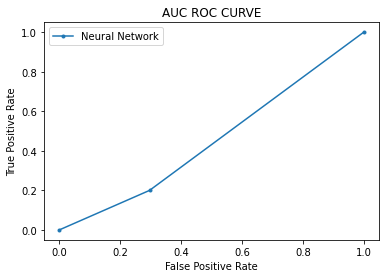

In [243]:
import matplotlib.pyplot as plt

plt.title('AUC ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.plot(cr_fpr, cr_tpr, linestyle='--',linewidth=3, label='CRIB')
#plt.plot(cr2_fpr, cr2_tpr, 'r+',linestyle='--', label='CRIB II')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Neural Network')
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='SNAPPE II')
#plt.plot(ns2_fpr, ns2_tpr, linestyle='--', label='SNAP II')
#plt.plot(log_fpr, log_tpr, marker='.', label='Logistic Regression')
plt.legend(loc=0)
#plt.savefig('AUC_2.png',dpi=1200)

In [244]:
roc_auc_score(snap_2.true_outcome,snap_2.pred)

0.45171102661596957

In [245]:
ds = pd.DataFrame(snap_2.pred)

In [246]:
ds['true_outcome'] = snap_2.true_outcome

In [247]:
ds.to_csv('snap_2_10_Jan.csv')

In [248]:
snappe = data.copy()

In [249]:
cols_snappe = ['uhid', 'dischargestatus', 'birthweight', 
       'weight_galevel', 'central_temp', 'bp_mean', 'admissionweight',
       'new_ph', 'apgar_fivemin', 'po2_fio2_ratio',
       'urine_output']

In [250]:
snappe = snappe[cols_snappe]

snappe

,uhid,dischargestatus,birthweight,weight_galevel,central_temp,bp_mean,admissionweight,new_ph,apgar_fivemin,po2_fio2_ratio,urine_output
0,RSHI.0000016326,Discharge,1630.0,0,35.7,38.0,1630.0,7.21,9.0,2.49,0.000256
4,RSHI.0000021953,Death,890.0,1,35.7,38.0,890.0,7.21,8.0,2.49,1.000000
17,RSHI.0000023186,Discharge,2467.0,0,35.7,38.0,2091.0,7.21,9.0,2.49,0.000219
25,RSHI.0000023179,Discharge,3231.0,0,35.7,38.0,3231.0,7.21,9.0,2.49,0.000258
32,RSHI.0000022313,Discharge,1730.0,0,35.7,38.0,1730.0,7.21,9.0,2.49,1.000000
41,RSHI.0000014327,Discharge,2564.0,0,35.7,38.0,2564.0,7.21,9.0,2.49,1.000000
46,RSHI.0000014844,Discharge,1980.0,0,35.7,38.0,1980.0,7.21,8.0,2.49,1.000000
51,RSHI.0000014911,Discharge,1833.0,0,35.7,38.0,1833.0,7.21,9.0,2.49,0.000296
58,RSHI.0000017640,Discharge,2973.0,0,35.7,38.0,2725.0,7.21,9.0,2.49,0.000199
65,RNEH.0000013244,Discharge,1416.0,1,35.7,38.0,1416.0,7.21,9.0,2.49,0.000265


In [251]:
snappe.to_csv('snappe_2.csv')

In [252]:
dh = pd.DataFrame(columns=snappe.columns)
for i in uhids:
    x = snappe[snappe['uhid']==i]
    dh = dh.append(x,ignore_index=True)

In [253]:
uhids

array(['RSHI.0000016326', 'RSHI.0000021953', 'RSHI.0000023186',
       'RSHI.0000023179', 'RSHI.0000022313', 'RSHI.0000014327',
       'RSHI.0000014844', 'RSHI.0000014911', 'RSHI.0000017640',
       'RNEH.0000013244', 'RSHI.0000014306', 'RSHI.0000024608',
       'RNEH.0000014505', 'RSHI.0000022306', 'RSHI.0000024036',
       'RSHI.0000013958', 'RSHI.0000012851', 'RSHI.0000015772',
       'RSHI.0000015661', 'RSHI.000021978', 'RSHI.0000021977',
       'RSHI.0000019468', 'RSHI.0000022355', 'RSHI.0000016924',
       'RSHI.0000022118', 'RSHI.0000022117', 'RSHI.0000022054',
       'RSHI.0000023222', 'RSHI.0000017430', 'RSHI.0000022404',
       'RSHI.0000023255', 'RSHI.0000022000', 'RNEH.0000014594',
       'RSHI.0000022137', 'RSHI.0000022016', 'RNEH.0000013263',
       'RSHI.0000022092', 'RSHI.0000022108', 'RSHI.0000025737',
       'RSHI.0000022064', 'RSHI.0000022270', 'RSHI.0000022132',
       'RSHI.0000022093', 'RSHI.0000023343', 'RSHI.0000022346',
       'RSHI.0000022214', 'RSHI.000002221

In [254]:
snappe = dh.copy()

In [255]:
snappe['score'] = snappe.bp_mean.apply(mean_bp) + snappe.central_temp.apply(temp) + snappe.po2_fio2_ratio.apply(po2_fio2) + snappe.new_ph.apply(ph_calc)+snappe.urine_output.apply(urine_output_calc)+snappe.apgar_fivemin.apply(apgar)+snappe.birthweight.apply(birthweight_calc)+snappe.weight_galevel.apply(sga_calc)

In [256]:
def snappe_pred(x):
    if x>5:
        return 1
    else:
        return 0

In [257]:
snappe['pred'] = snappe['score'].apply(snappe_pred)
snappe['true_outcome'] = snappe['dischargestatus'].apply(bina)

In [258]:
snappe

,uhid,dischargestatus,birthweight,weight_galevel,central_temp,bp_mean,admissionweight,new_ph,apgar_fivemin,po2_fio2_ratio,urine_output,score,pred,true_outcome
0,RSHI.0000016326,Discharge,1630.0,0,35.7,38.0,1630.0,7.21,9.0,2.49,0.000256,23,1,0
1,RSHI.0000021953,Death,890.0,1,35.7,38.0,890.0,7.21,8.0,2.49,1.000000,27,1,1
2,RSHI.0000023186,Discharge,2467.0,0,35.7,38.0,2091.0,7.21,9.0,2.49,0.000219,23,1,0
3,RSHI.0000023179,Discharge,3231.0,0,35.7,38.0,3231.0,7.21,9.0,2.49,0.000258,23,1,0
4,RSHI.0000022313,Discharge,1730.0,0,35.7,38.0,1730.0,7.21,9.0,2.49,1.000000,5,0,0
5,RSHI.0000014327,Discharge,2564.0,0,35.7,38.0,2564.0,7.21,9.0,2.49,1.000000,5,0,0
6,RSHI.0000014844,Discharge,1980.0,0,35.7,38.0,1980.0,7.21,8.0,2.49,1.000000,5,0,0
7,RSHI.0000014911,Discharge,1833.0,0,35.7,38.0,1833.0,7.21,9.0,2.49,0.000296,23,1,0
8,RSHI.0000017640,Discharge,2973.0,0,35.7,38.0,2725.0,7.21,9.0,2.49,0.000199,23,1,0
9,RNEH.0000013244,Discharge,1416.0,1,35.7,38.0,1416.0,7.21,9.0,2.49,0.000265,35,1,0


In [259]:
snappe_fpr, snappe_tpr, _ = roc_curve(snappe.true_outcome,snappe.pred,drop_intermediate=False)

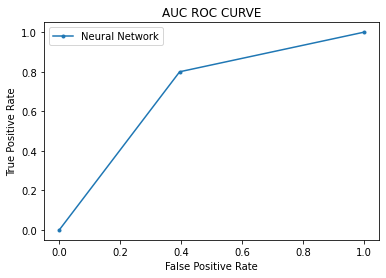

In [260]:
import matplotlib.pyplot as plt

plt.title('AUC ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.plot(cr_fpr, cr_tpr, linestyle='--',linewidth=3, label='CRIB')
#plt.plot(cr2_fpr, cr2_tpr, 'r+',linestyle='--', label='CRIB II')
plt.plot(snappe_fpr, snappe_tpr, marker='.', label='Neural Network')
#plt.plot(ns_fpr, ns_tpr, linestyle='--', label='SNAPPE II')
#plt.plot(ns2_fpr, ns2_tpr, linestyle='--', label='SNAP II')
#plt.plot(log_fpr, log_tpr, marker='.', label='Logistic Regression')
plt.legend(loc=0)
#plt.savefig('AUC_2.png',dpi=1200)

In [261]:
roc_auc_score(snappe.true_outcome,snappe.pred)

0.7022813688212928

In [262]:
snap = pd.DataFrame(snap_2.true_outcome)

In [263]:
snap['pred'] = snap_2.pred

In [264]:
snap.to_csv('snap_2_auc_roc_new.csv')

In [265]:
snappe_2 = pd.DataFrame(snappe.true_outcome)

In [266]:
snappe_2['pred'] = snappe.pred

In [267]:
snappe_2.to_csv('snappe_2_AUC_ROC_new.csv')

In [268]:
#reports
#Results might vary with each iteration as Deep Neural Networks,initially assigns random weights.
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(snappe.true_outcome,snappe.pred))
print(confusion_matrix(snappe.true_outcome,snappe.pred))

              precision    recall  f1-score   support

           0       0.99      0.60      0.75       789
           1       0.04      0.80      0.07        15

    accuracy                           0.61       804
   macro avg       0.52      0.70      0.41       804
weighted avg       0.98      0.61      0.74       804

[[477 312]
 [  3  12]]


In [269]:
print(classification_report(snap_2.true_outcome,snap_2.pred))
print(confusion_matrix(snap_2.true_outcome,snap_2.pred))

              precision    recall  f1-score   support

           0       0.98      0.70      0.82       789
           1       0.01      0.20      0.02        15

    accuracy                           0.69       804
   macro avg       0.50      0.45      0.42       804
weighted avg       0.96      0.69      0.80       804

[[555 234]
 [ 12   3]]


In [109]:
dt = pd.DataFrame(snappe.pred)
dt['true_outcome'] = snap_2.true_outcome

In [ ]:
#dt.to_csv('snappe_10_jan.csv')

In [ ]:
#snappe.to_csv('SNAPPE_2_10_jan_2020.csv')

In [ ]:
#data.to_csv('SNAPPE_2_10_jan_2020.csv')

In [ ]:
dg = pd.DataFrame(columns=data.columns)

In [ ]:
for i in uhid:
    x = data[data['uhid']==i]
    dg = dg.append(x,ignore_index=True)

In [ ]:
#dg.to_csv('SNAPPE_final.csv')

In [92]:
len(uhid)

1693